## Coin Toss Example
Ilyas Ustun

In [11]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
# import seaborn as sns
from scipy import stats

warnings.simplefilter(action="ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")


Running on PyMC3 v3.11.1
Running on ArviZ v0.11.2


### Data

In [5]:
n = 10 #trials
x = 4  #number of heads

## Setting the model

### Prior
- Prior probability of coming heads (p) has a beta distribution alpha and beta parameters.

$$    f(x \mid \alpha, \beta) =
       \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} 
$$

- Since we know that a fair coin has probability of 0.5 coming heads, we can make use of this knowledge as prior, which is why alpha and beta are set to 30.

### Likelihood:
- An experiment is carried and the oberved data is recorded. 
- This experiment constitutes the likelihood. 
- By giving the `observed` paramter the data observed, we are telling pymc that this is not prior, but likelihood.
- The likelihood is binomial with a success rate `p`, number of trials `n`, number of heads occuring `x`.   

$$
f(x \mid n, p) = \binom{n}{x} p^x (1-p)^{n-x}
$$

In [6]:
#beta distribution
alpha = 30 
beta = 30  

#draws
draws = 500

with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=x)
    
    # inference
    trace = pm.sample(draws=draws, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 19 seconds.


In [9]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.485,0.061,0.372,0.599,0.002,0.002,757.0,1338.0,1.01


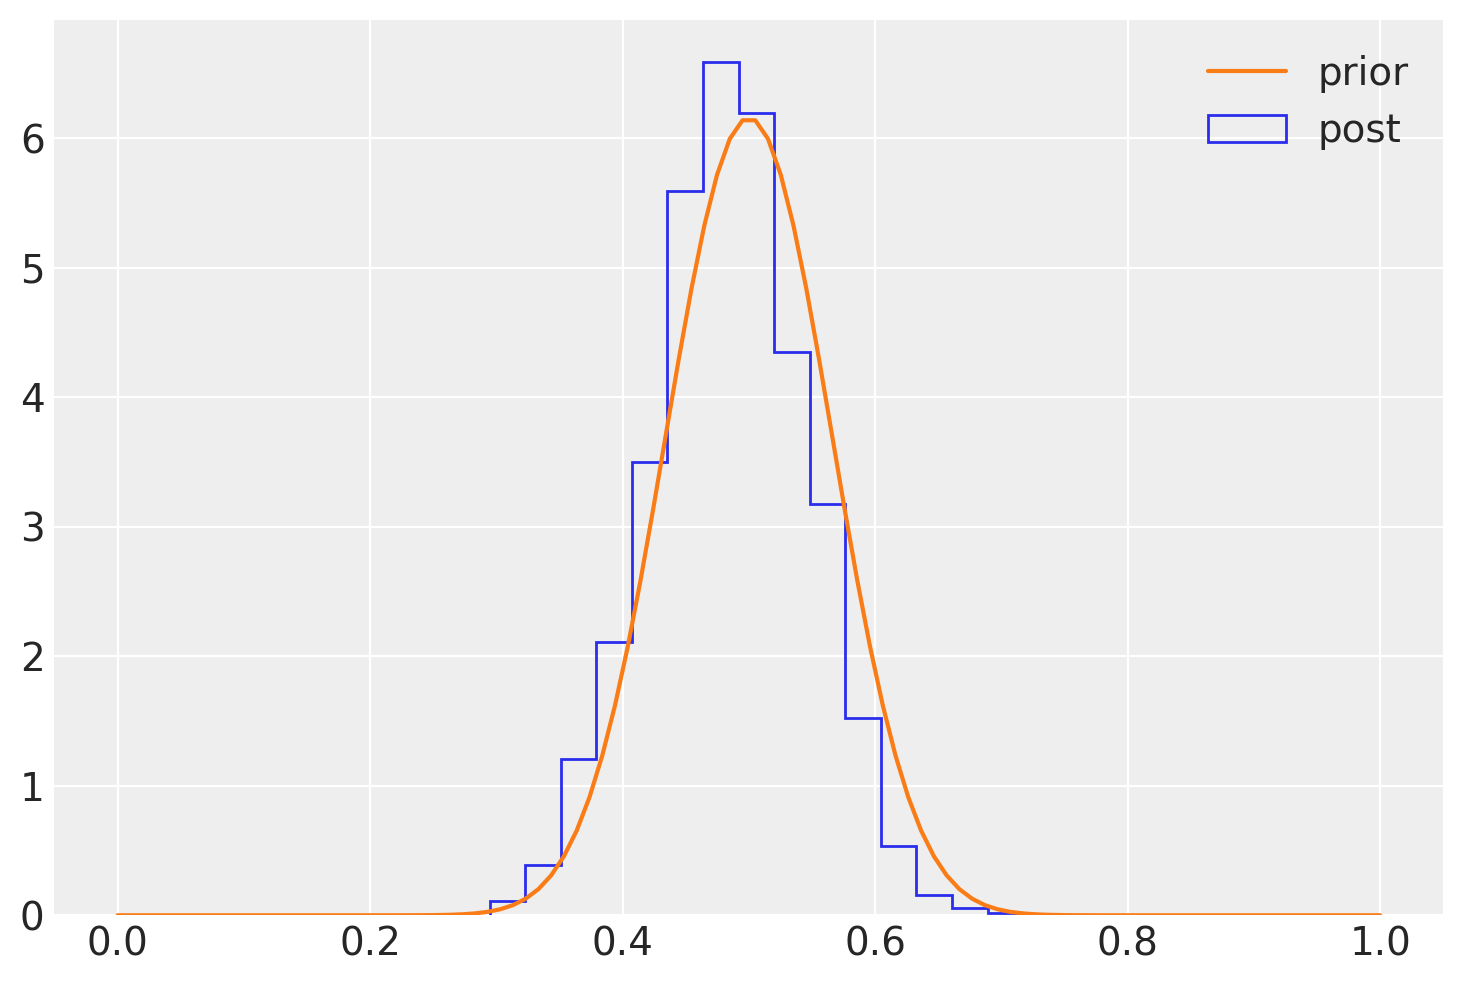

In [13]:
plt.hist(trace['p'], 15, histtype='step', label='post', density=True);
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

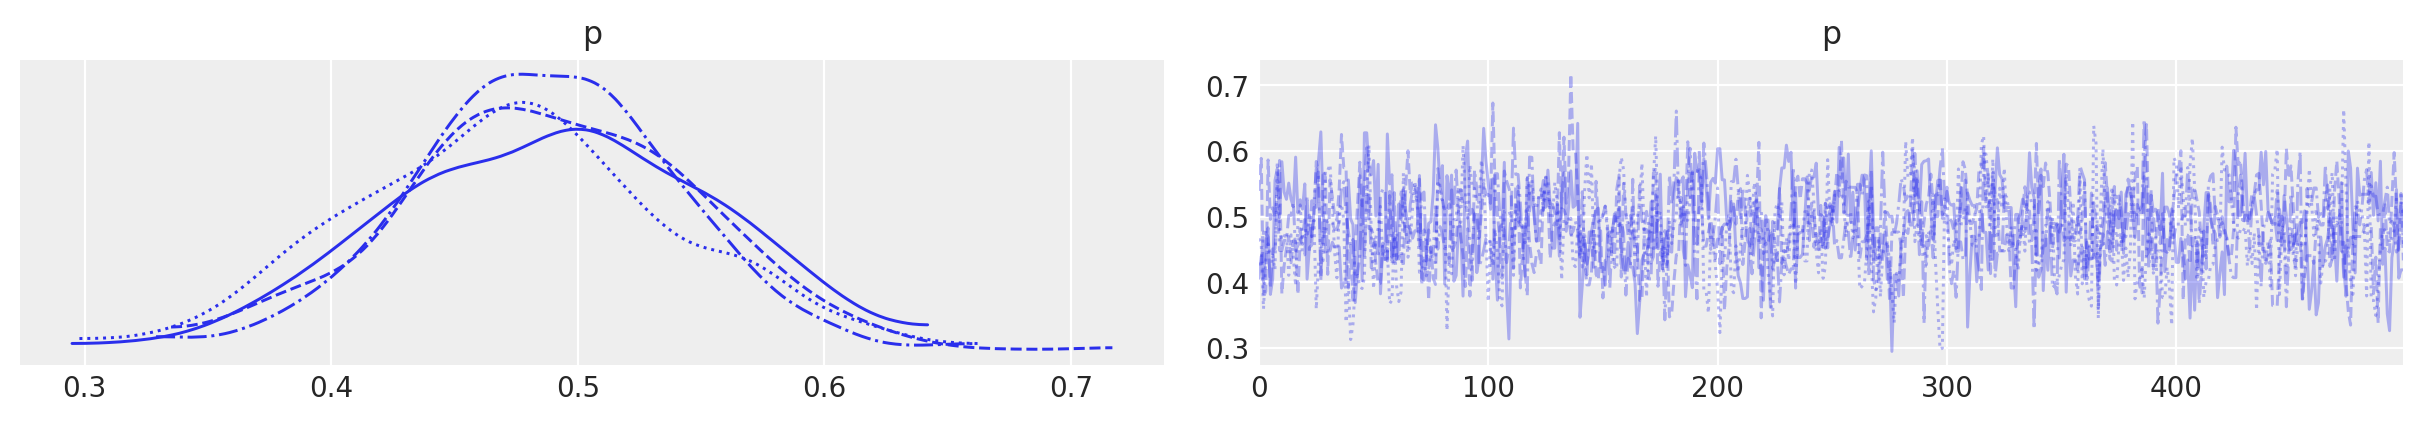

In [16]:
az.plot_trace(trace)

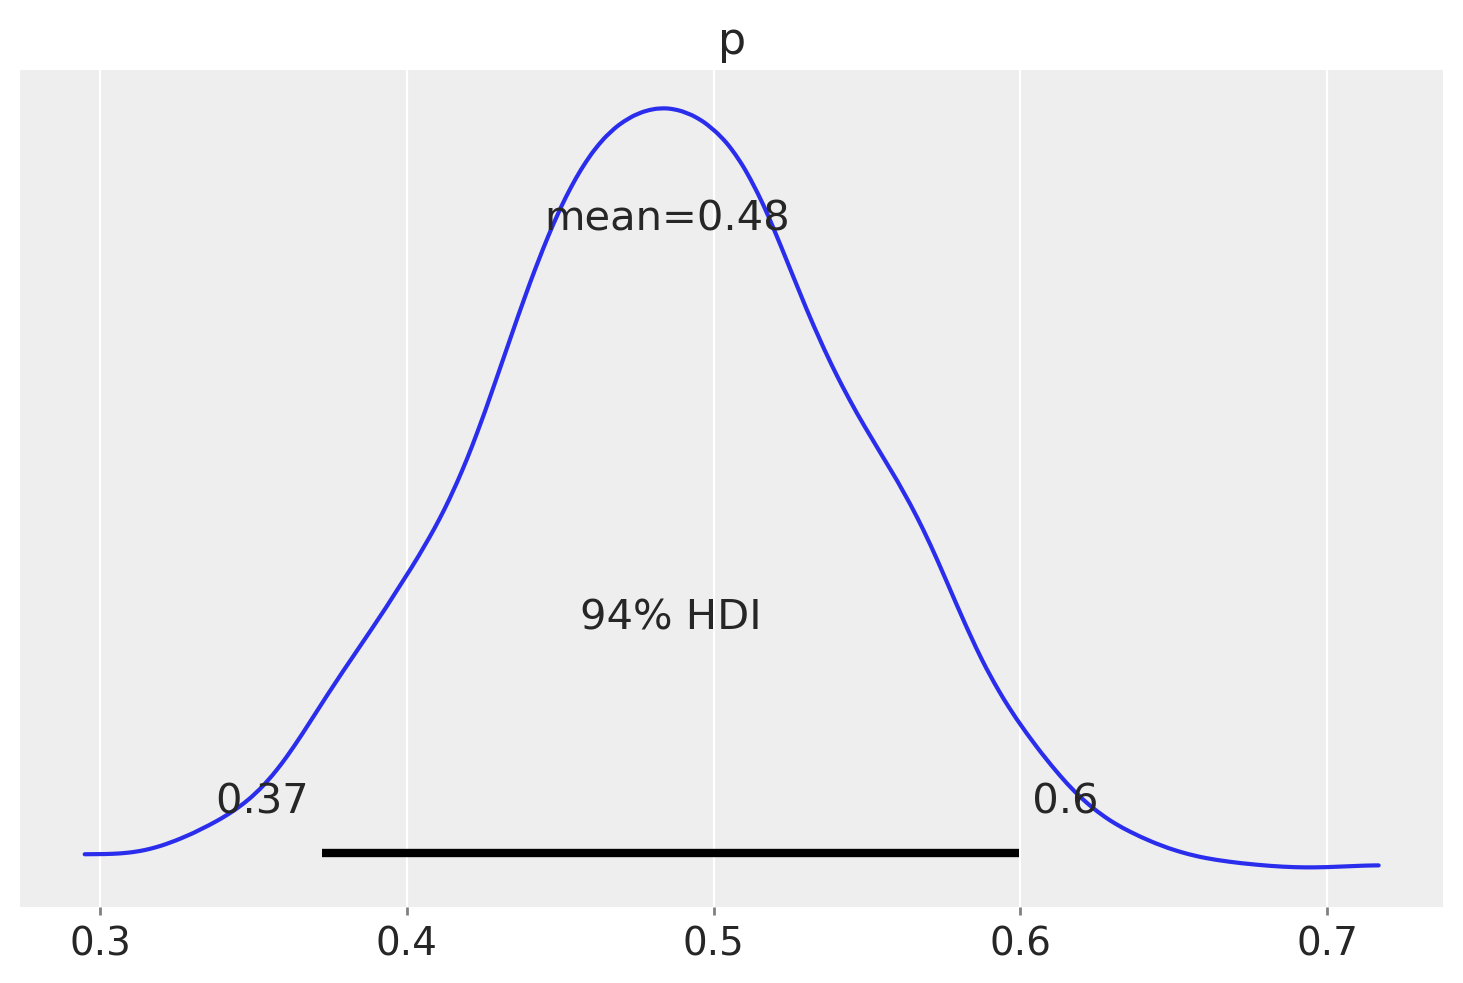

In [17]:
az.plot_posterior(trace);

#### Exercise: Run Bayesian inference using a non-informative prior

1) Use a binomial likelihood  with a beta (1,1) prior.

2) Use a binomial likelihood  with a uniform (0,1) prior.

In [18]:
#beta distribution
alpha = 1
beta = 1

#draws
draws = 100

with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=x)
    
    # inference
    trace = pm.sample(draws=draws, cores=4)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.7123017065237253, but should be close to 0.8. Try to increase the number of tuning steps.


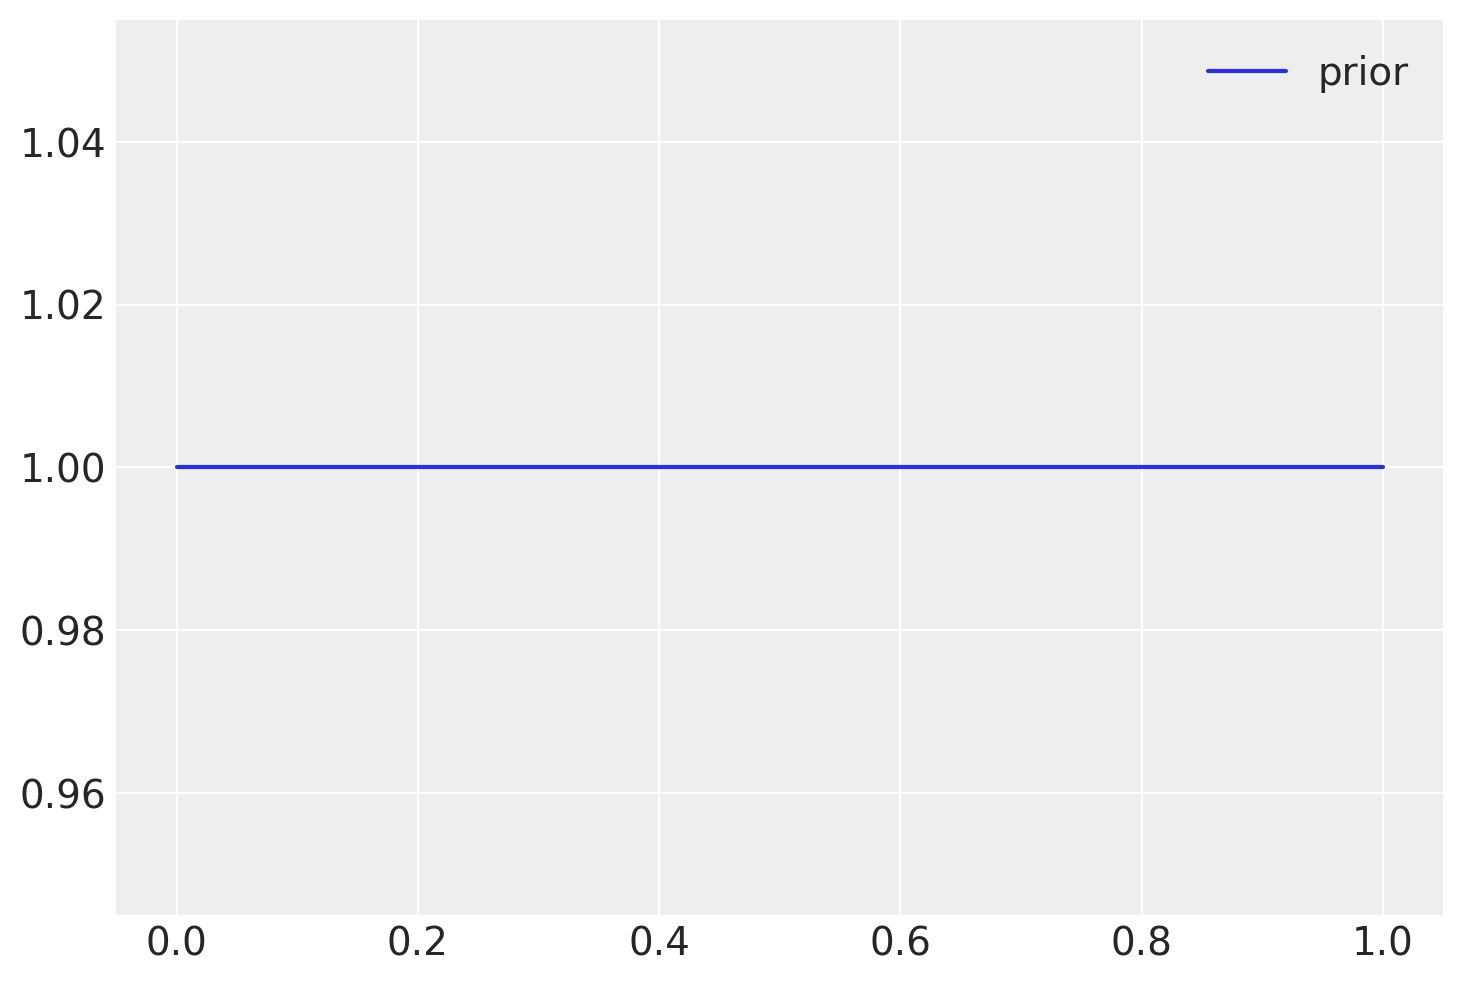

In [19]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

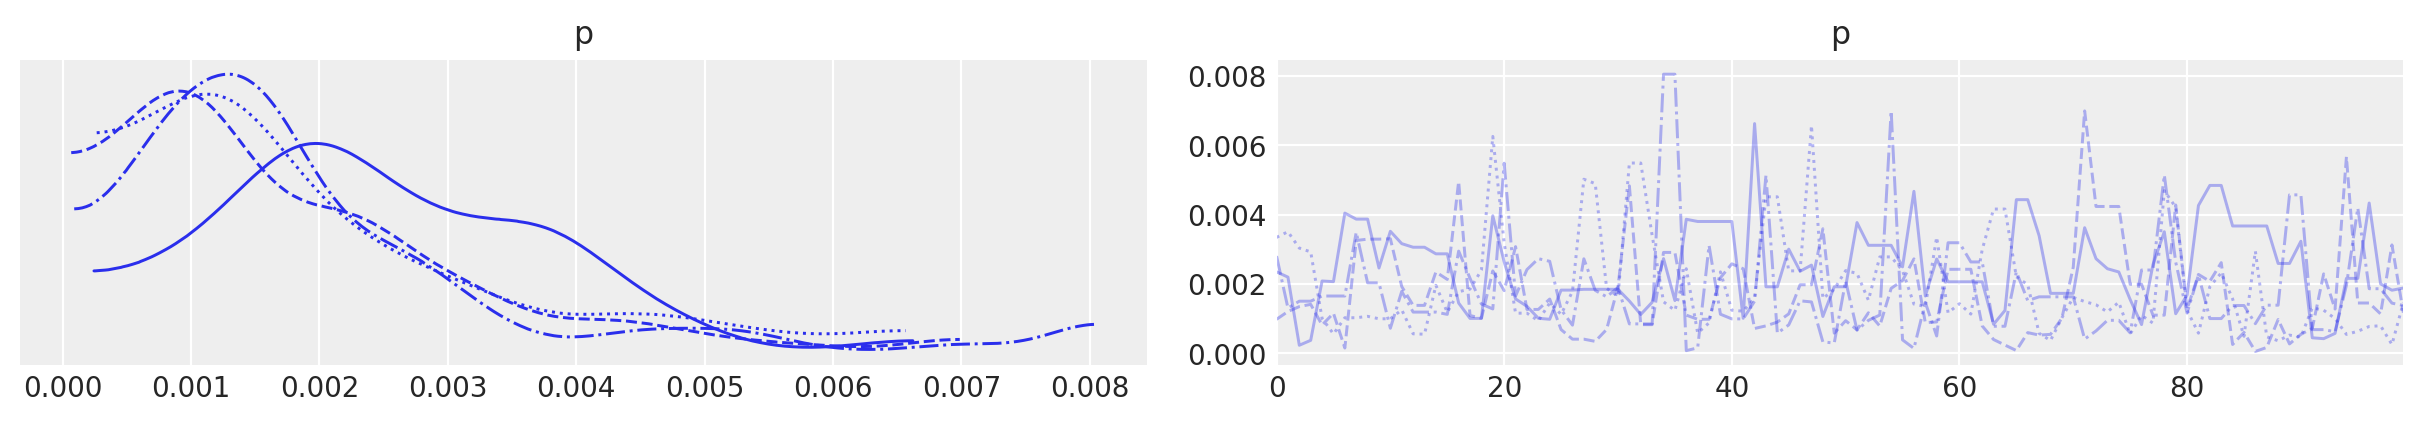

In [20]:
az.plot_trace(trace)